# Plot Token Correction Rate in LayoutDM

In [1]:
%cd ..
%load_ext autoreload
%autoreload 2

/app


/usr/local/lib/python3.10/dist-packages/IPython/core/magics/osm.py:417: UserWarning: using dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


In [2]:
from __future__ import annotations

import matplotlib.pyplot as plt
import numpy as np
import os

import scienceplots

In [3]:
# define plot style
plt.style.use(['science','no-latex', 'grid'])
color_list = plt.rcParams['axes.prop_cycle'].by_key()['color']

## Data Preparation

In [12]:
!python bin/test_error_token_detection.py download/pretrained_weights/rico25/layoutdm/0/ --corr_job_dir ./download/pretrained_weights/rico25/layout_corrector/0/ --corr_timesteps 0 10 20 30 40 50 60 70 80 90 --num_replace 3 --save_dir ./token_correction_results

## Error token detection by Corrector

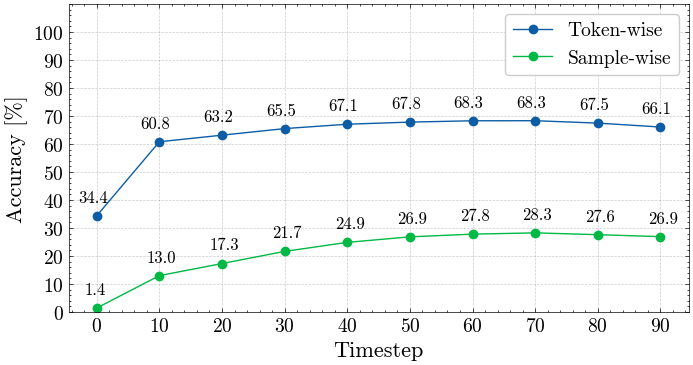

In [5]:
SAVE_DIR = "./token_correction_results"
if not os.path.exists(SAVE_DIR):
    os.makedirs(SAVE_DIR, exist_ok=True)

# Please reflect the output of bin/test_error_token_detection.py
timestep2token_wise_acc = {
    0: 34.39228702386597,
    10: 60.826616089773985,
    20: 63.17370001580528,
    30: 65.52868658131817,
    40: 67.08550655919076,
    50: 67.84415994942312,
    60: 68.31831831831832,
    70: 68.34202623676308,
    80: 67.48854117275171,
    90: 66.08977398451083
}
timestep2sample_wise_acc =  {
    0: 1.4461830251303935,
    10: 13.01564722617354,
    20: 17.330488383119963,
    30: 21.66903745851114,
    40: 24.893314366998577,
    50: 26.861071597913703,
    60: 27.833096254148888,
    70: 28.28354670459934,
    80: 27.643432906590803,
    90: 26.932195353247984
}

x_axis = np.array(list(timestep2token_wise_acc.keys()))
y_token_acc = np.array(list(timestep2token_wise_acc.values()))
y_sample_acc = np.array(list(timestep2sample_wise_acc.values()))

h, w = 4, 8
fig, ax = plt.subplots(1, 1, figsize=(w, h))  # (nrow, ncol)
ax.tick_params(axis="x", labelsize=14)
ax.tick_params(axis="y", labelsize=14)

multiplier = 0
width = 0.15
    
ax.set_xlabel("Timestep", fontsize=16)
ax.set_ylabel("Accuracy [%]", fontsize=16)
ax.set_xticks(np.arange(0, 101, 10))
ax.set_yticks(np.arange(0, 101, 10))
ax.set_ylim(0, 110)
ax.grid(visible=True, alpha=0.2, axis="both")
ax.plot(x_axis, y_token_acc, label="Token-wise", marker="o")
for x, y in timestep2token_wise_acc.items():
    ax.annotate(f"{y:.1f}", xy=(x - 3, y + 5), fontsize=12)
ax.plot(x_axis, y_sample_acc, label="Sample-wise", marker="o")
for x, y in timestep2sample_wise_acc.items():
    ax.annotate(f"{y:.1f}", xy=(x - 2, y + 5), fontsize=12, )
ax.legend(fontsize=14)

fig.savefig(os.path.join(SAVE_DIR, f"corrector_error-token-detection-accuracy.pdf"))
plt.show()